**Loading the Dataset and overview**

In [112]:
import yfinance as yf
from datetime import datetime, date

try:
    # 📅 Set date range: last 20 years
    end = datetime.now()
    start = date(end.year - 5, end.month, end.day)


    # 🏷️ Define stock ticker
    stock = 'AAPL'

    # ⬇️ Download historical stock data
    df = yf.download(stock, start, end)

    # ✅ Confirm download
    if df.empty:
        raise ValueError(f"No data was returned for stock: {stock}")
    else:
        print(f"✅ Successfully downloaded data for {stock}")
        print(f"📊 DataFrame shape: {df.shape}")
        print(f"🗓️ Date range: {df.index.min().date()} to {df.index.max().date()}")

except Exception as e:
    print("❌ An error occurred:", e)

finally:
    print("✅ Final: Script execution completed.")




[*********************100%***********************]  1 of 1 completed

✅ Successfully downloaded data for AAPL
📊 DataFrame shape: (1257, 5)
🗓️ Date range: 2020-05-18 to 2025-05-16
✅ Final: Script execution completed.


**Data-Assessing**

In [113]:
#importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
%matplotlib inline
pd.set_option('display.max_columns',10)

In [114]:
df.shape

(1257, 5)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-05-18 to 2025-05-16
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1257 non-null   float64
 1   (High, AAPL)    1257 non-null   float64
 2   (Low, AAPL)     1257 non-null   float64
 3   (Open, AAPL)    1257 non-null   float64
 4   (Volume, AAPL)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [116]:
df.head(5)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-05-18,76.540726,76.914974,75.413129,76.105730,135178400
2020-05-19,76.098450,77.405877,76.066856,76.557749,101729600
2020-05-20,77.578415,77.648885,76.919833,76.958716,111504800
2020-05-21,77.000023,77.981815,76.761863,77.439884,102688800
2020-05-22,77.495773,77.578398,76.635490,76.737553,81803200


In [117]:
df.tail(5)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800
2025-05-13,212.929993,213.399994,209.000000,210.429993,51909300
2025-05-14,212.330002,213.940002,210.580002,212.429993,49325800
2025-05-15,211.449997,212.960007,209.539993,210.949997,45029500
2025-05-16,211.259995,212.570007,209.770004,212.320007,53164417


In [118]:
df.sample(4)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-08-15,170.692093,170.889205,168.878635,169.046181,54091700
2024-03-21,170.341232,176.424503,169.814415,175.987142,106181300
2020-11-16,117.352852,118.025943,115.255522,116.006655,91183000
2025-04-10,190.170624,194.524915,182.760343,188.822401,121880000


In [119]:
df.isnull().sum().sort_values(ascending=False)

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [120]:
df.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,AAPL,1257.0,1.631940e+02,3.892236e+01,7.609845e+01,1.352698e+02,1.611540e+02,1.873740e+02,2.583967e+02
High,AAPL,1257.0,1.648668e+02,3.912406e+01,7.691497e+01,1.370067e+02,1.631387e+02,1.883507e+02,2.594741e+02
Low,AAPL,1257.0,1.613306e+02,3.861686e+01,7.541313e+01,1.331950e+02,1.587167e+02,1.858163e+02,2.570100e+02
Open,AAPL,1257.0,1.630328e+02,3.883704e+01,7.610573e+01,1.350828e+02,1.606076e+02,1.872056e+02,2.575687e+02
Volume,AAPL,1257.0,8.128638e+07,4.194752e+07,2.323470e+07,5.269690e+07,7.105760e+07,9.672170e+07,3.743368e+08


**Data-Cleaning**

In [121]:
#  Select the 'Close' column for 'TSLA'
df = df[('Close', 'AAPL')]

#  Convert it to a DataFrame and rename column to 'Price'
df = df.to_frame(name='Price')

#  Set index name (optional)
df.index.name = 'Date'

print(df.head())


                Price
Date                 
2020-05-18  76.540726
2020-05-19  76.098450
2020-05-20  77.578415
2020-05-21  77.000023
2020-05-22  77.495773


**EDA**

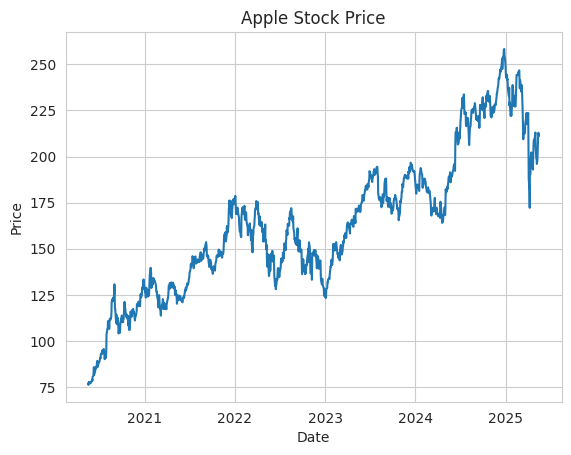

In [122]:

sns.lineplot(data=df,x=df.index, y='Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price')

plt.show()

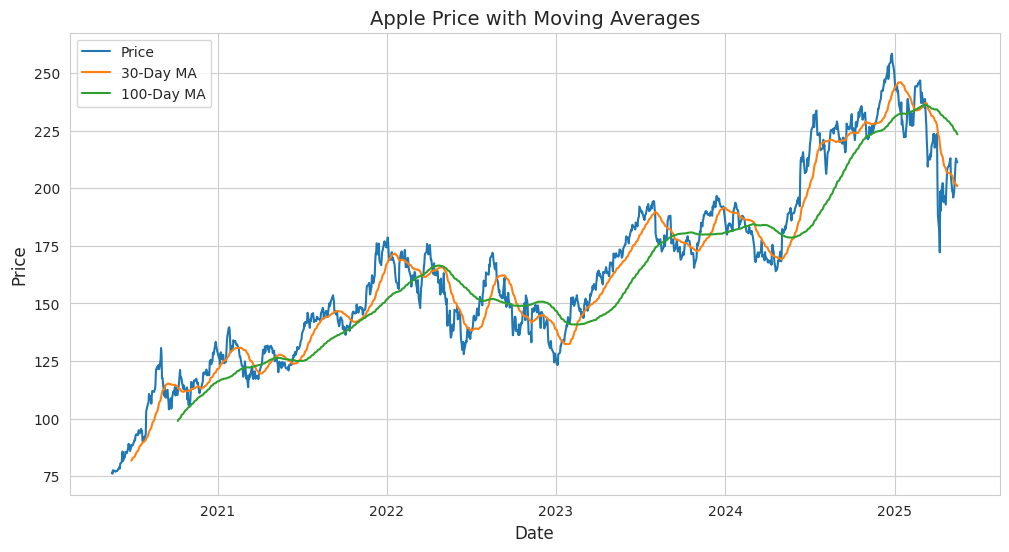

In [123]:
df['30D_MA'] = df['Price'].rolling(window=30).mean()
df['100D_MA'] = df['Price'].rolling(window=100).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Price'], label='Price')
sns.lineplot(x=df.index, y=df['30D_MA'], label='30-Day MA')
sns.lineplot(x=df.index, y=df['100D_MA'], label='100-Day MA')
plt.title('Apple Price with Moving Averages', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
#plt.tight_layout()
plt.show()

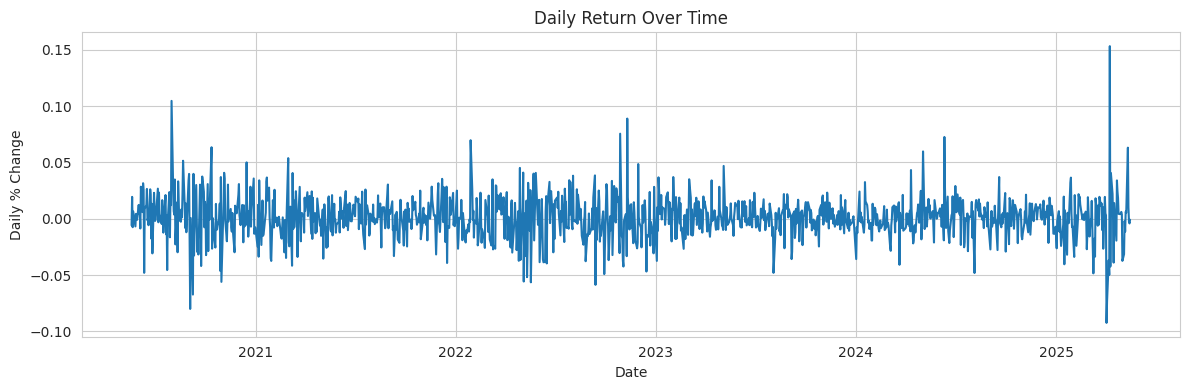

In [124]:
#Analysisng (Volatility) risky or stable was Tesla on a day-to-day basis, over the years
# Calculate daily return
df['Daily Return'] = df['Price'].pct_change()



# 📈 Line plot of Daily Returns
plt.figure(figsize=(12, 4))
sns.lineplot(x=df.index, y=df['Daily Return'])
plt.title("Daily Return Over Time")
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.grid(True)
plt.tight_layout()
plt.show()



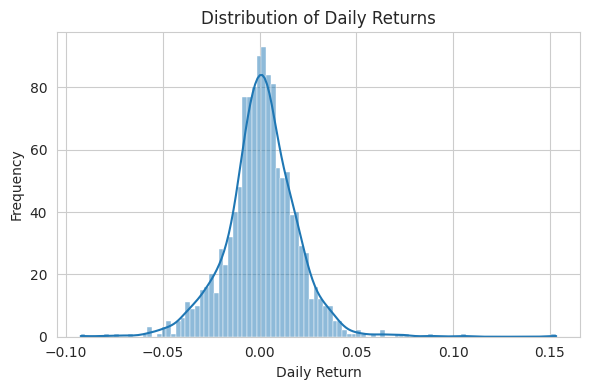

In [125]:
# 📊 Histogram of Daily Returns
plt.figure(figsize=(6, 4))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

**Model -Building**

*LSTM are sensitive to scale of data, so we apply MIN-MAX Scalar*

In [126]:
df.drop(columns={'30D_MA', '100D_MA', 'Daily Return'}, inplace=True)





In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))


In [128]:
df

array([[0.00242611],
       [0.        ],
       [0.00811837],
       ...,
       [0.74730052],
       [0.74247323],
       [0.74143097]])

In [129]:
train_size = int(len(df)*0.65)
test_size = len(df)-train_size
train_data,test_data = df[0:train_size,:],df[train_size:len(df),:1]


In [130]:
(train_size,test_size)

(817, 440)

In [131]:
def create_dataset(dataset,time_step=1):
  dataX, dataY =  [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0] #i=0,   1,2,3..
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX) , np.array(dataY)

In [132]:
#reshape into x=t,t+1,t+2,t+3
time_step = 100
x_train ,y_train = create_dataset(train_data,time_step)
x_test ,y_test = create_dataset(test_data,time_step)


In [133]:
(x_train.shape,y_train.shape)

((716, 100), (716,))

In [134]:
(x_test.shape,y_test.shape)

((339, 100), (339,))

In [135]:
#reshape input to be [samples,time steps ,features] which is required in LSTM. so converting in 3D shape because LSTM in keras expect input as [samples,time steps ,features]
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the Stacked LSTM model
model = Sequential()

# First LSTM layer (returns sequences to stack another LSTM)
model.add(LSTM(units=50, return_sequences=True, input_shape=(100, 1)))

# Second LSTM layer (returns sequences to stack another)
model.add(LSTM(units=50, return_sequences=True))

# Third LSTM layer (final LSTM layer)
model.add(LSTM(units=50))

# Fully connected output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')




In [137]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=64,

    verbose=1
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 310ms/step - loss: 0.0969 - val_loss: 0.0360
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - loss: 0.0063 - val_loss: 0.0143
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - loss: 0.0043 - val_loss: 0.0388
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - loss: 0.0033 - val_loss: 0.0199
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - loss: 0.0025 - val_loss: 0.0102
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0020 - val_loss: 0.0051
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - loss: 0.0018 - val_loss: 0.0044
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 

In [139]:
#  Predict on train and test data
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#  Inverse transform to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#  Evaluate performance using RMSE
import math
from sklearn.metrics import mean_squared_error

# RMSE on Training Data
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
print("Train Data RMSE:", train_rmse)

# RMSE on Test Data
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print("Test Data RMSE:", test_rmse)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Train Data RMSE: 150.48272004981115
Test Data RMSE: 215.3696168782412


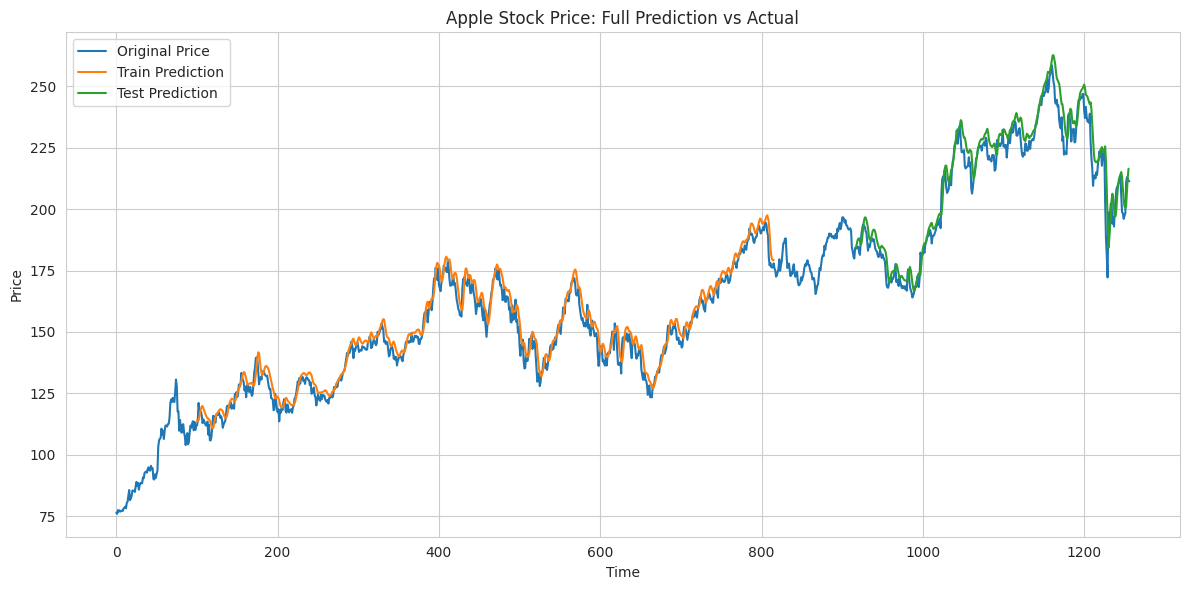

In [140]:
look_back = 100  # or set this to your input_window. time_step

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df), label='Original Price')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend()
plt.grid(True)
plt.title("Apple Stock Price: Full Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


In [142]:
model.save('AAPL_Train.keras')